# Project 2: Building a Color Magnitude Diagram of Open and Globular Clusters

NAME: Lipika Chatur

UTEID: lc42977

DATE: Sep. 22, 2022


Goals: The goal is to use Gaia data to find clusters in 2 'pointings' and plot 

Data sets: 
1. pointing1.fits [4.7MB] = this contains the data from a single pointing in Gaia DR3; https://utexas.box.com/s/iuoge4sslbqdp4bc01znzxueugdl1ui7
2. pointing2.fits [6.6MB] = this contains the data from a second single pointing in Gaia DR3; https://utexas.box.com/s/hd3086ctmrilxq0v8pq6rted2cgd68k8


Lets begin by loading our libraries: 



In [1]:
#lets make a plots interactive
%matplotlib widget 

#Importing libraries 
import numpy as np
import matplotlib.pyplot as p
import astropy
from astropy.table import Table
import scipy.stats
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates import Galactic
from astropy.coordinates import ICRS
import astropy.coordinates as apycord
import random
from cycler import cycler
import astropy.table

#Lets set some of the default parameters for plotting. This cell is not needed but i like to style my plots.
p.rc('axes',prop_cycle=(cycler('color', ['k','b','g','r','c','m','y'])))
p.rcParams['lines.linewidth']= 1.5
p.rcParams['axes.linewidth']=2.0
#---comment (or remove) this block if you do not have latex----
p.rcParams['text.usetex']= True
p.rcParams['mathtext.fontset']= 'custom'
p.rcParams['mathtext.default']= 'rm'
p.rcParams['axes.formatter.use_mathtext']=False
#----------------------------------------
p.rcParams['font.size']= 15.0
p.rcParams['axes.labelsize']=16.0
p.rcParams['axes.unicode_minus']=False
p.rcParams['xtick.major.size']=6
p.rcParams['xtick.minor.size']=3
p.rcParams['xtick.major.width']=1.5#2.0
p.rcParams['xtick.minor.width']=1.0
p.rcParams['axes.linewidth']=2.5
p.rcParams['axes.titlesize']=20#'large'
p.rcParams['xtick.labelsize'] = 20#'x-large' # fontsize of the tick labels
p.rcParams['ytick.labelsize']=20 #'x-large'
p.rcParams['ytick.major.width']=2.0 #4
p.rcParams['ytick.minor.width']=1.0 #2.0

## Load in Pointing 1
Lets begin with 1 pointing at a time to make things easier. 


Further, lets start by loading in the data for pointing 1 (first) and see whats there.

In [92]:
# 2pts 
#insert code here
#add soultion here (1pt)
T = Table.read('./pointing1.fits') #lets read in the fits table this is downloaded from the Gaia archive upon the completion of the ADQL query 
#NOTE: for this to work its T= Table.read(full path of data table './' = local folder/directory)
T.colnames #this allows us to see the column names 

['source_id',
 'ra',
 'dec',
 'parallax',
 'pmra',
 'pmdec',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'pmra_error',
 'pmdec_error',
 'ag_gspphot',
 'azero_gspphot',
 'bp_rp',
 'ebpminrp_gspphot',
 'radial_velocity',
 'radial_velocity_error']

In [93]:
T[0:10].show_in_notebook()

idx,source_id,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,pmra_error,pmdec_error,ag_gspphot,azero_gspphot,bp_rp,ebpminrp_gspphot,radial_velocity,radial_velocity_error
,,deg,deg,mas,mas / yr,mas / yr,mag,mag,mag,mas / yr,mas / yr,mag,mag,mag,mag,km / s,km / s
0,574053612113914880,3.7005149342773342,85.99591165556983,0.232642108422647,-1.6450655232017568,1.4303242225421497,17.794336318969727,18.16469955444336,17.253087997436523,0.1357828974723816,0.11722778528928757,0.002899999963119626,0.0035000001080334187,0.9116115570068359,0.0015999999595806003,--,--
1,574053616408992256,3.771305101604993,85.98302878349351,0.26540992901209604,-0.2425257685335387,2.603995674980489,20.895151138305664,21.550342559814453,19.835546493530273,2.0498180389404297,1.7232251167297363,--,--,1.7147960662841797,--,--,--
2,574053753848593536,3.2482962375558326,85.98847071737374,0.62874786222037,-1.2118841133073024,5.464570365439961,14.8974027633667,15.40037727355957,14.240478515625,0.024657685309648514,0.022502949461340904,--,--,1.1598987579345703,--,--,--
3,574053783912601344,3.520913828391704,85.98421458667598,0.35476163730590315,-3.9638903978780444,2.6737564788061485,17.579883575439453,18.01526641845703,17.02589988708496,0.10359470546245575,0.09107767045497894,0.003700000001117587,0.0044999998062849045,0.9893665313720703,0.0020000000949949026,--,--
4,574053783912608640,3.3461253245341953,86.00141478441311,0.42497481928342656,-2.5171359742039803,-0.746572799429371,17.140798568725586,17.546903610229492,16.582942962646484,0.07991261780261993,0.06934938579797745,0.020600000396370888,0.025299999862909317,0.9639606475830078,0.011099999770522118,--,--
5,574053788207614208,3.411162564634185,85.99674320499322,2.233318412198788,12.02563592119957,8.319159598425093,20.441068649291992,21.395692825317383,19.32098960876465,1.082017183303833,0.903895378112793,--,--,2.0747032165527344,--,--,--
6,574053818271924096,3.38236383096802,86.01129323855899,0.23845633364513943,2.2562621014661373,7.826841064301226,18.75079345703125,19.119117736816406,18.282533645629883,0.19750244915485382,0.1922127604484558,0.003599999938160181,0.004399999976158142,0.8365840911865234,0.0020000000949949026,--,--
7,574053818272063872,3.4032108631413704,86.00496043442325,1.1307033089250818,9.024656645821509,1.2297330899665082,20.47788429260254,21.330989837646484,19.782258987426758,0.7870343327522278,1.0275250673294067,--,--,1.5487308502197266,--,--,--
8,574053818272347264,3.4689453458750945,86.002531505374,1.5210438554562133,13.83606694097756,-0.23308400113524125,19.04184341430664,20.472064971923828,17.858304977416992,0.2527528405189514,0.23878732323646545,--,--,2.613759994506836,--,--,--


You should get something like the following columns
'source_id' = source id of the star

 'source_id' = source id of the star
 
 'ra', = RA in deg 
 
 'dec', = declination in deg
 
 'parallax', = parallax in mas
 
 'pmra', = proper motion * cos(DEC) in the RA direction in mas/yr
 
 'pmdec', proper motion in declination in in mas/yr
 
 'phot_g_mean_mag', apparent G magnitude in mag
 
 'phot_bp_mean_mag',apparent BP magnitude in mag
 
 'phot_rp_mean_mag',apparent RP magnitude in mag
 
 'pmra_error', = error in proper motion * cos(DEC) in the RA direction in mas/yr
 
 'pmdec_error', error proper motion in declination in mas/yr
 
 'ag_gspphot', A_G (extinction in Gaia G) in mag
 
 'azero_gspphot', A0_G specific extinction in G at 550 nm 
 
 'bp_rp', BP-RP

 
 'ebpminrp_gspphot', E(BP-RP) reddening in mag
 
 
 'radial_velocity' = Radial Velocity in km/s
 
 'radial_velocity_error' = error Radial Velocity in km/s
 

## Plot the Equatorial positions for Pointing 1


Plot a 2-D histogram (hexbin) of the sky positions of the stars in pointing 1

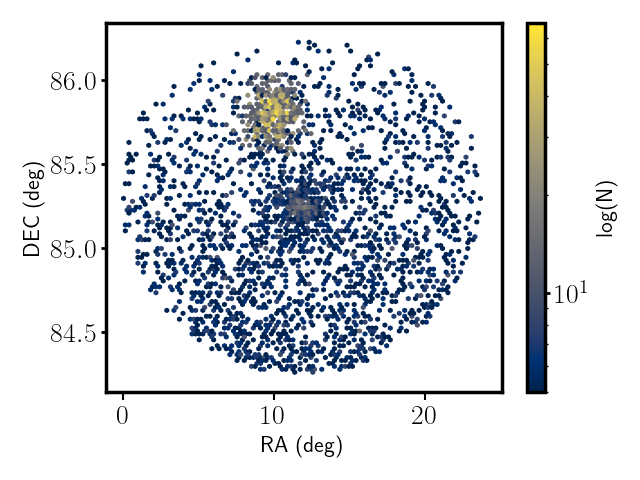

In [94]:
# 4pts 
#insert code here
#try changing the mincnt in the hexbin from 1 to 5 and see what happens 
RA = (T['ra']) #calling column ra 
DEC = (T['dec']) #calling column dec 

#----plot 1 Equatorial Coordinates------
p.figure()
#we will use hexbin which creates hexagonal bins and the color in each bin represents the number of stars in that bin
#bins='log' will define logarthimic bins; mincnt = defined the min count to plot

PLT= p.hexbin(RA,DEC,bins='log', mincnt=5,cmap='cividis') #create a hexbin/2d histogram of ra,dec with log bins. 
#in the above mincnt = 1 means there must be at least 1 star in the bin!
p.colorbar(PLT,label='log(N)') #add the colorbar to the hexbin defined as PLT
p.xlabel('RA (deg)') #Ra x label
p.ylabel('DEC (deg)') # dec y label
p.tight_layout() #remove white spaces

#--------

**Q1: Are there any overdensities  in the field/pointing? If so, how many?**

A1: Yes there are about 2 blobs or overdensities near (12, 85) and (10, 86), the top one being more dense.

If there are any overdensities select them using the where function and print how many stars are in each.

In [95]:
#3pts 
#insert code here
#Remember that conditions must be in the form: np.where((condition 1)&(condition 2) & (...))[0]
top_stars = len(np.where( ((RA >= 7.87) & (RA <= 11.78)) & ((DEC >= 85.6) & (DEC <= 86.0))  )[0])
print('There are about %i stars that are observable in top overdensity.'%top_stars)
bottom_stars = len(np.where( ((RA >= 11.08) & (RA <= 12.77)) & ((DEC >= 85.1) & (DEC <= 85.3))  )[0])
print('There are about %i stars that are observable in bottom overdensity.'%bottom_stars)

There are about 5008 stars that are observable in top overdensity.
There are about 686 stars that are observable in bottom overdensity.


## Finding Clusters in Pointing 1

We must now turn our attention to determining if any of the overdensities (if there were any) are actual clusters or not. 

We will start by looking at the PMRA/PMDEC space and the the parallax distribution of any overdensities that were found in the spatial plots above. 

Lets now plot the 2d distribution (hexbin) of  PMRA and PMDEC for any spatial overdensity regions seperatly (make sure to label the plot using plt.title('name of the plot'). I would HIGHLY reccomend using a mincount (mincnt) of 1 stars per bin, log bins, a gridsize (gridsize=150).  

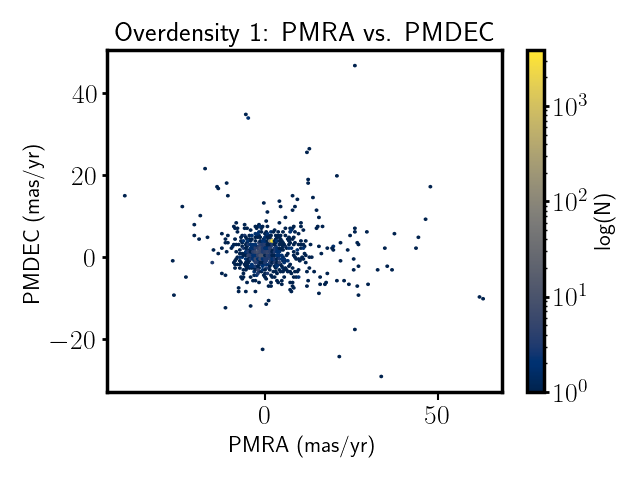

In [96]:
#8pts
#insert code here
blob_1 = np.where( ((RA >= 7.87) & (RA <= 11.78)) & ((DEC >= 85.6) & (DEC <= 86.0))  )
blob_2 = np.where( ((RA >= 11.08) & (RA <= 12.77)) & ((DEC >= 85.1) & (DEC <= 85.3))  )

PMRA = (T['pmra']) #calling column ra 
PMDEC = (T['pmdec']) #calling column dec 
#print(blob_1) is index # of each star in blob

PMRA_blob1 = PMRA[blob_1]
PMDEC_blob1 = PMDEC[blob_1] 

PMRA_blob2 = PMRA[blob_2]
PMDEC_blob2 = PMDEC[blob_2]

#----plot 1 Equatorial Coordinates------
p.figure()
#we will use hexbin which creates hexagonal bins and the color in each bin represents the number of stars in that bin
#bins='log' will define logarthimic bins; mincnt = defined the min count to plot

PLT= p.hexbin(PMRA_blob1,PMDEC_blob1,bins='log', mincnt=1,gridsize=150,cmap='cividis') #create a hexbin/2d histogram of ra,dec with log bins. 
#in the above mincnt = 1 means there must be at least 1 star in the bin!
p.colorbar(PLT,label='log(N)') #add the colorbar to the hexbin defined as PLT
p.title('Overdensity 1: PMRA vs. PMDEC')
p.xlabel('PMRA (mas/yr)') #Ra x label
p.ylabel('PMDEC (mas/yr)') # dec y label
p.tight_layout() #remove white spaces

#--------



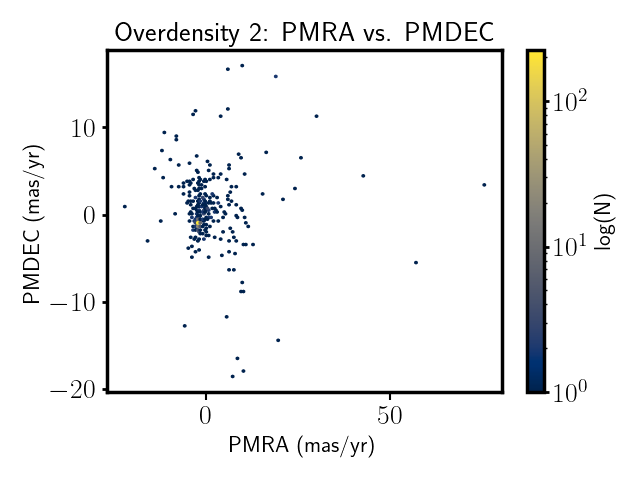

In [97]:
p.figure()

PLT= p.hexbin(PMRA_blob2,PMDEC_blob2,bins='log', mincnt=1,gridsize=150,cmap='cividis') #create a hexbin/2d histogram of ra,dec with log bins. 
#in the above mincnt = 1 means there must be at least 1 star in the bin!
p.colorbar(PLT,label='log(N)') #add the colorbar to the hexbin defined as PLT
p.title('Overdensity 2: PMRA vs. PMDEC')
p.xlabel('PMRA (mas/yr)') #Ra x label
p.ylabel('PMDEC (mas/yr)') # dec y label
p.tight_layout() #remove white spaces

#--------

**Q2: Are there any overdensities found in the PMRA/PMDEC plot of any of the spatially dense regions (in RA/DEC)? If so, what do these mean?**

A2: Yes, there is two dense regions found in the PMRA/PMDEC plots. This indicates a stong possiblity of cluster.

For all spatial overdensitites identify the location of/select the proper motion overdensity (if any) using the where function. Make sure to be careful with indexing. 

In [98]:
#4 pts 
#insert code here
top_stars1 = len(np.where( ((PMRA >= 1.56) & (PMRA <= 2.63)) & ((PMDEC>= 3.47) & (PMDEC<= 4.39))  )[0])
print('There are about %i stars that are observable in Overdensity 1.'%top_stars1)
bottom_stars1 = len(np.where( ((PMRA >= -2.84) & (PMRA <= -1.78)) & ((PMDEC>= -1.46) & (PMDEC<= -0.5))  )[0])
print('There are about %i stars that are observable in Overdensity 2.'%bottom_stars1)

There are about 4496 stars that are observable in Overdensity 1.
There are about 1557 stars that are observable in Overdensity 2.


Now, plot the parallax distrubtion (on a single plot/figure) for each cluster candidate (i.e. any who cluster in all PMRA/PMDEC/RA/DEC)

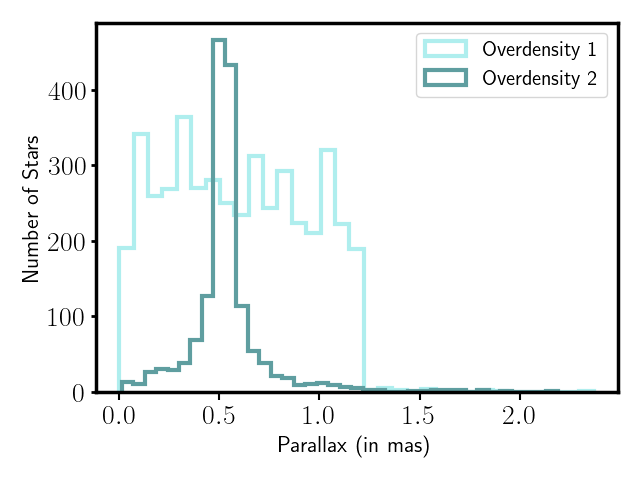

In [113]:
top_stars = (np.where( ((PMRA >= 1.56) & (PMRA <= 2.63)) & ((PMDEC>= 3.47) & (PMDEC<= 4.39))  )[0])
bottom_stars = (np.where( ((PMRA >= -2.84) & (PMRA <= -1.78)) & ((PMDEC>= -1.46) & (PMDEC<= -0.5))  )[0])
parallax = T['parallax']
parallax_cluster1 = parallax[top_stars]
parallax_cluster2 = parallax[bottom_stars]

p.figure()#facecolor='black'
p.hist(parallax_cluster1,bins="scott",histtype="step",color='paleturquoise',linewidth=3,label='Overdensity 1') #histtype=step
p.hist(parallax_cluster2,bins="scott",histtype="step",color='cadetblue',linewidth=3,label='Overdensity 2') #histtype=step
p.xlabel('Parallax (in mas)') #Ra x label
p.ylabel('Number of Stars') 
p.legend()
p.tight_layout()


Q3 : How many real clusters are in Pointing 1? How do you know?

A3: There is one real cluster in Pointing 1 because the parallax graph indicates a significant peak on Overdensity's 2 data. On the Overdenstiy 1 graph, there is not ONE significant peak. In order for us to declare something to be a cluster, it needs to be cluster-like in RA vs. DEC (spacial/sky), PMRA vs. PMDEC (motion, third dimension), and parallax. 

For any real cluster, compute the median and standard deivation of the parallaxes

In [100]:
#2 pts
#insert code here
a= np.median(parallax_cluster2)
print('The median distance is', a,'pc.')
b= np.std(parallax_cluster2)
print('The standard deviation is', b,'pc.')

The median distance is 0.5256698996220692 pc.
The standard deviation is 0.19215886637696677 pc.


Q4: What is the median distance to any clusters you found (ignore the effects of parallax uncertainties)?

A4: The median distance is 0.5256698996220692  pc.

## Plot the Color-Abs magnitude Diagram for Clusters in Pointing 1
Lets now plot the Color (bp-rp) - absolute magntiude (M_G) diagram for each cluster found in pointing 1. Lets make sure to plot them on the same diagram for comparision.  

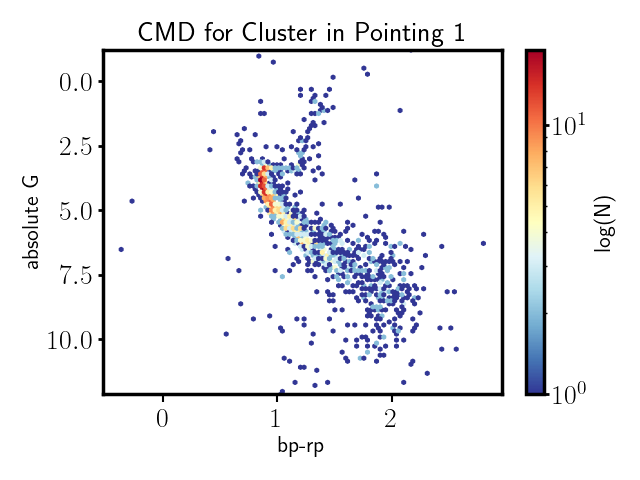

In [114]:
#8 pts
#insert code here
#to invert for CMD use p.gca().invert_yaxis()
bottom_stars = (np.where( ((PMRA >= -2.84) & (PMRA <= -1.78)) & ((PMDEC>= -1.46) & (PMDEC<= -0.5))  )[0])
bprp = T['bp_rp']
absG = T['phot_g_mean_mag']
bprp_cluster = bprp[bottom_stars]
absG_cluster = absG[bottom_stars]

x= 1000/parallax_cluster2
absG_axis = absG_cluster - 5. * np.log10(x/10) 

p.figure()
p.hexbin(bprp_cluster,absG_axis,bins='log', mincnt=1,cmap='RdYlBu_r') 
#p.plot(bprp_cluster,absG_axis,'k.') 
p.xlabel('bp-rp') #Ra x label
p.ylabel('absolute G') #
p.title('CMD for Cluster in Pointing 1')
p.ylim(max(absG_axis), min(absG_axis))
p.colorbar(label='log(N)') #add the colorbar to the hexbin defined as PLT
p.tight_layout()

#--------

## Load in Pointing 2
Lets now move to the second pointing 

Its easiest to begin by loading in the data and seeing whats there.

In [115]:
# 2pts 
#insert code here
R = Table.read('./pointing2.fits') #lets read in the fits table this is downloaded from the Gaia archive upon the completion of the ADQL query 
#NOTE: for this to work its T= Table.read(full path of data table './' = local folder/directory)
R.colnames #this allows us to see the column names 

['source_id',
 'ra',
 'dec',
 'parallax',
 'pmra',
 'pmdec',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'ag_gspphot',
 'azero_gspphot',
 'bp_rp',
 'ebpminrp_gspphot',
 'radial_velocity',
 'radial_velocity_error']

You should get something like the following columns
'source_id' = source id of the star

 'source_id' = source id of the star
 
 'ra', = RA in deg 
 
 'dec', = declination in deg
 
 'parallax', = parallax in mas
 
 'pmra', = proper motion * cos(DEC) in the RA direction in mas/yr
 
 'pmdec', proper motion in declination in in mas/yr
 
 'phot_g_mean_mag', apparent G magnitude in mag
 
 'phot_bp_mean_mag',apparent BP magnitude in mag
 
 'phot_rp_mean_mag',apparent RP magnitude in mag
  
 'ag_gspphot', A_G (extinction in Gaia G) in mag
 
 'azero_gspphot', A0_G specific extinction in G at 550 nm 
 
 'bp_rp', BP-RP
 
 'ebpminrp_gspphot', E(BP-RP) reddening in mag
 
 'radial_velocity' = Radial Velocity in km/s
 
 'radial_velocity_error' = error Radial Velocity in km/s
 

## Plot the Equatorial positions for Pointing 2


Plot a 2-D histogram (hexbin) of the sky positions of the stars in pointing 2

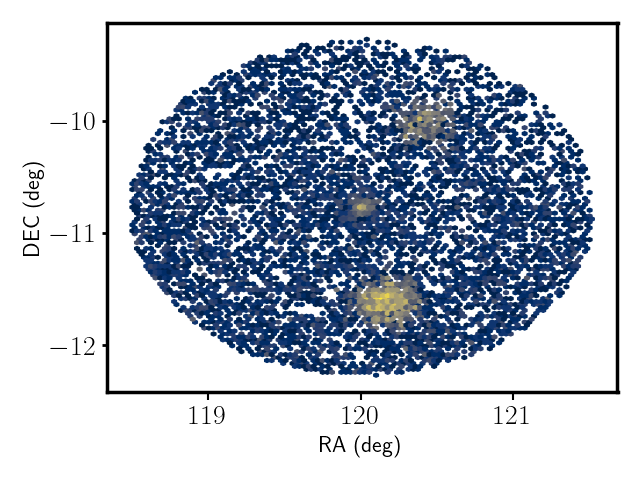

In [116]:
# 4pts 
#insert code here
#try changing the mincnt in the hexbin from 1 to 5 and see what happens 
#----plot 1 Equatorial Coordinates------
p.figure()

RA1 = R['ra']
DEC1 = R['dec']
#we will use hexbin which creates hexagonal bins and the color in each bin represents the number of stars in that bin
#bins='log' will define logarthimic bins; mincnt = defined the min count to plot

PLT= p.hexbin(RA1,DEC1,bins='log', mincnt=5,cmap='cividis') #create a hexbin/2d histogram of ra,dec with log bins. 
#in the above mincnt = 1 means there must be at least 1 star in the bin!
#p.colorbar(PLT,label='log(N)') #add the colorbar to the hexbin defined as PLT
p.xlabel('RA (deg)') #Ra x label
p.ylabel('DEC (deg)') # dec y label
p.tight_layout() #remove white spaces

#--------

Q5: Are there any overdensitites in the pointing 2? If so, how many?

A5: There are 3 overdensitites.

If there are any overdensities select them using the where function and print how many stars are in each.

In [117]:
#4pts 
#insert code here
#Remember that conditions must be in the form: np.where((condition 1)&(condition 2) & (...))[0]
topmost_cluster = len(np.where( ((RA1 >= 120.2) & (RA1 <= 120.6)) & ((DEC1>= -10.1) & (DEC1<= -9.9))  )[0])
print('There are about %i stars that are observable in top overdensity.'%topmost_cluster)
middle_cluster = len(np.where( ((RA1 >= 119.9) & (RA1 <= 120.1)) & ((DEC1>= -10.9) & (DEC1<= -10.669))  )[0])
print('There are about %i stars that are observable in bottom overdensity.'%middle_cluster)
bottom_cluster = len(np.where( ((RA1 >= 120.02) & (RA1 <= 120.389)) & ((DEC1>= -11.73) & (DEC1<= -11.4))  )[0])
print('There are about %i stars that are observable in bottom overdensity.'%bottom_cluster)

There are about 1592 stars that are observable in top overdensity.
There are about 840 stars that are observable in bottom overdensity.
There are about 4789 stars that are observable in bottom overdensity.


## Finding Clusters in Pointing 2

We must now turn our attention to determining if any of the overdensities (if there were any) are actual clusters or not. 

If there are any overdensities plot the parallax distribution of each overdensity on a single plot. The bins should use "Scott's" rule. 

Lets now plot the 2d distribution (hexbin) of  PMRA and PMDEC for any spatial overdensity regions seperatly (make sure to label the plot using plt.title('name of the plot'). I would HIGHLY reccomend using a mincount (mincnt) of 1 stars per bin, log bins, a gridsize (gridsize=50).  

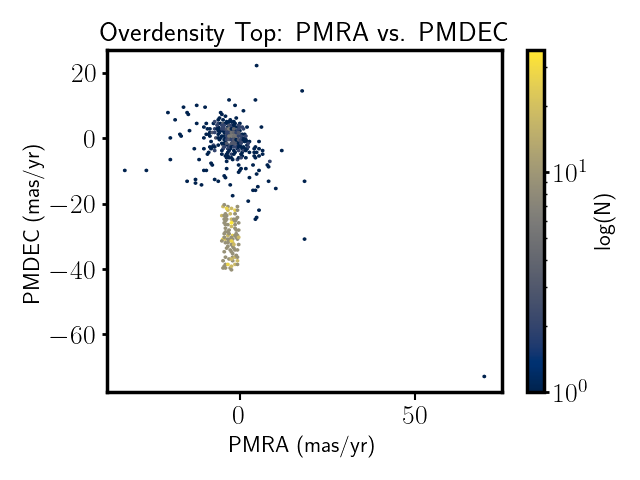

In [118]:
#12pts
#insert code here
#8pts
#insert code here
topmost_cluster1 = np.where( ((RA1 >= 120.2) & (RA1 <= 120.6)) & ((DEC1>= -10.1) & (DEC1<= -9.9)) )
middle_cluster = np.where( ((RA1 >= 119.9) & (RA1 <= 120.1)) & ((DEC1>= -10.89) & (DEC1<= -10.669))  )[0]
bottom_cluster3 = np.where( ((RA1 >= 120.02) & (RA1 <= 120.389)) & ((DEC1>= -11.73) & (DEC1<= -11.4))  )

PMRA1 = (R['pmra']) #calling column ra 
PMDEC1 = (R['pmdec']) #calling column dec 

PMRA_top = PMRA1[topmost_cluster1]
PMDEC_top = PMDEC1[topmost_cluster1] 

PMRA_middle = PMRA1[middle_cluster2]
PMDEC_middle = PMDEC1[middle_cluster2]

PMRA_bottom = PMRA1[bottom_cluster3]
PMDEC_bottom = PMDEC1[bottom_cluster3]

#----plot 1 Equatorial Coordinates------
p.figure()
#we will use hexbin which creates hexagonal bins and the color in each bin represents the number of stars in that bin
#bins='log' will define logarthimic bins; mincnt = defined the min count to plot

PLT= p.hexbin(PMRA_top,PMDEC_top,bins='log', mincnt=1,gridsize=150,cmap='cividis') #create a hexbin/2d histogram of ra,dec with log bins. 
#in the above mincnt = 1 means there must be at least 1 star in the bin!
p.colorbar(PLT,label='log(N)') #add the colorbar to the hexbin defined as PLT
p.title('Overdensity Top: PMRA vs. PMDEC')
p.xlabel('PMRA (mas/yr)') #Ra x label
p.ylabel('PMDEC (mas/yr)') # dec y label
p.tight_layout() #remove white spaces

#--------



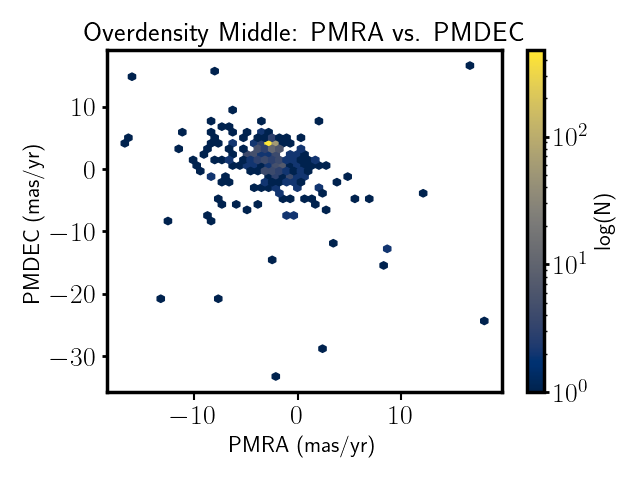

In [128]:
p.figure()
#we will use hexbin which creates hexagonal bins and the color in each bin represents the number of stars in that bin
#bins='log' will define logarthimic bins; mincnt = defined the min count to plot

PLT= p.hexbin(PMRA_middle,PMDEC_middle,bins='log', mincnt=1,gridsize=50,cmap='cividis') #create a hexbin/2d histogram of ra,dec with log bins. 
#in the above mincnt = 1 means there must be at least 1 star in the bin!
p.colorbar(PLT,label='log(N)') #add the colorbar to the hexbin defined as PLT
p.title('Overdensity Middle: PMRA vs. PMDEC')
p.xlabel('PMRA (mas/yr)') #Ra x label
p.ylabel('PMDEC (mas/yr)') # dec y label
p.tight_layout() #remove white spaces

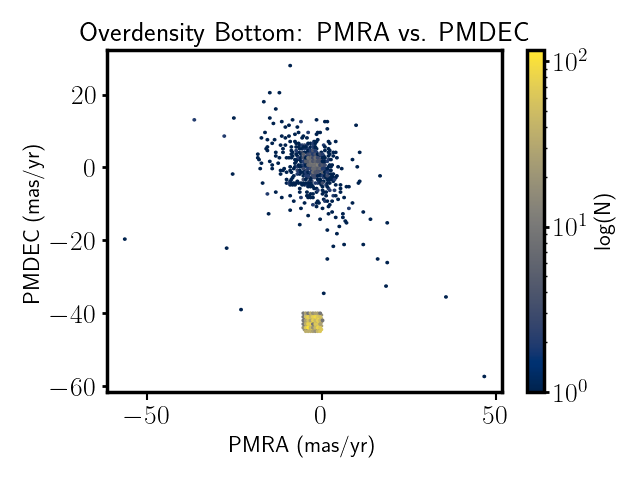

In [120]:
p.figure()
#we will use hexbin which creates hexagonal bins and the color in each bin represents the number of stars in that bin
#bins='log' will define logarthimic bins; mincnt = defined the min count to plot

PLT= p.hexbin(PMRA_bottom,PMDEC_bottom,bins='log', mincnt=1,gridsize=150,cmap='cividis') #create a hexbin/2d histogram of ra,dec with log bins. 
#in the above mincnt = 1 means there must be at least 1 star in the bin!
p.colorbar(PLT,label='log(N)') #add the colorbar to the hexbin defined as PLT
p.title('Overdensity Bottom: PMRA vs. PMDEC')
p.xlabel('PMRA (mas/yr)') #Ra x label
p.ylabel('PMDEC (mas/yr)') # dec y label
p.tight_layout() #remove white spaces

Q6: Are there any *significant* (key word significant meaning well above the background) overdensities found in the PMRA/PMDEC plot(s) of any of the spatially dense regions (in RA/DEC)? If so, what do these mean?

A6: Yes, there is 1 significant overdense region found in the Middle Overdensity plot. This is a good indicator that there is a cluster in that space.

For all (signficant) spatial overdensitites identify the location of the proper motion overdensity (if any) using the where function. Be very careful about your indexing.

In [121]:
#3 pts
#insert code here
top_stars2 = np.where( ((PMRA1 >= -5.01) & (PMRA1 <=  -0.26)) & ((PMDEC1>= -40.6 ) & (PMDEC1<=  -20.4))  )[0]
print('There are about %i stars that are observable in Middle Overdensity.'%len(top_stars2))

middle_stars2 = np.where( ((PMRA1 >= -2.91) & (PMRA1 <=  -2.19)) & ((PMDEC1>= 3.07) & (PMDEC1<= 4.28))  )[0]
print('There are about %i stars that are observable in Middle Overdensity.'%len(middle_stars2))

bottom_stars2 = np.where( ((PMRA1 >= -5.64) & (PMRA1 <=  -0.04)) & ((PMDEC1>= -45.32)) & (PMDEC1<= -39.67 ))  [0]
print('There are about %i stars that are observable in Middle Overdensity.'%len(bottom_stars2))

There are about 2229 stars that are observable in Middle Overdensity.
There are about 1279 stars that are observable in Middle Overdensity.
There are about 5043 stars that are observable in Middle Overdensity.


Plot the parallax distrubtion (on a single plot/figure) for each cluster candidate

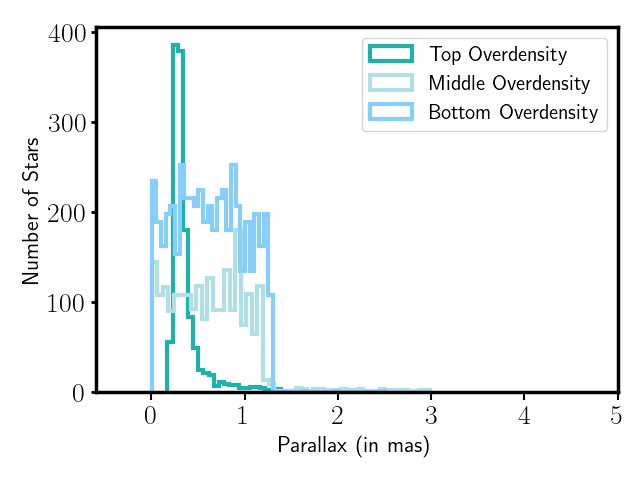

In [124]:
#4 pts
#insert code here.
parallax2 = R['parallax']
parallax_cluster3 = parallax2[middle_stars2]
parallax_cluster4 = parallax2[top_stars2]
parallax_cluster5 = parallax2[bottom_stars2]

p.figure()#facecolor='black'
p.hist(parallax_cluster3,bins=50,histtype="step",color='lightseagreen',linewidth=3,label='Top Overdensity') #histtype=step
p.hist(parallax_cluster4,bins=50,histtype="step",color='powderblue',linewidth=3,label='Middle Overdensity') #histtype=step
p.hist(parallax_cluster5,bins=50,histtype="step",color='lightskyblue',linewidth=3,label='Bottom Overdensity') #histtype=step
p.legend()
p.xlim([-.6,5])
#p.ylim([0,30])
p.xlabel('Parallax (in mas)') #Ra x label
p.ylabel('Number of Stars') 
p.tight_layout()



Q7 : How many real clusters are in Pointing 2? How do you know?

A7: There is one real cluster (specifcally the middle overdensity plot) in Pointing 2 because after plotting all graphs (RA vs DEC, PMRA vs PMDEC, and parallax), the criteria for a real cluster is satifisfied. The spatial plot (aka RA vs DEC) and proper motion plot both indicated overdense regions. But after plotting the all our prospective cluster on a parallax histogram, we were able to see that only one has a peak which is a good indication of a cluster.

For any real cluster, compute the median and standard deivation of the parallaxes

In [125]:
#2pts
#insert code here.
c= np.median(parallax_cluster3)
print('The median distance is', c,'pc.')
d= np.std(parallax_cluster3)
print('The standard deviation is', d,'pc.')

The median distance is 0.3049972356580771 pc.
The standard deviation is 0.21466846810876156 pc.


Q8: What is the median distance to any clusters you found in pointing 2 (ignore the effects of parallax uncertainties)?

A8: The median distance is 0.5139141238322162 pc.

## Plot the Color-Abs magnitude Diagram for Clusters in Pointing 1 and Pointing 2
Lets now plot the combined Color absolute magntiude diagram for each cluster found in pointing 1 and 2. Lets make sure to plot them on the same diagram for comparision. 

Below plot the color-abs. magnitude diagram (bp-rp) vs M_G for all "true" clusters

Text(0, 0.5, 'absolute G')

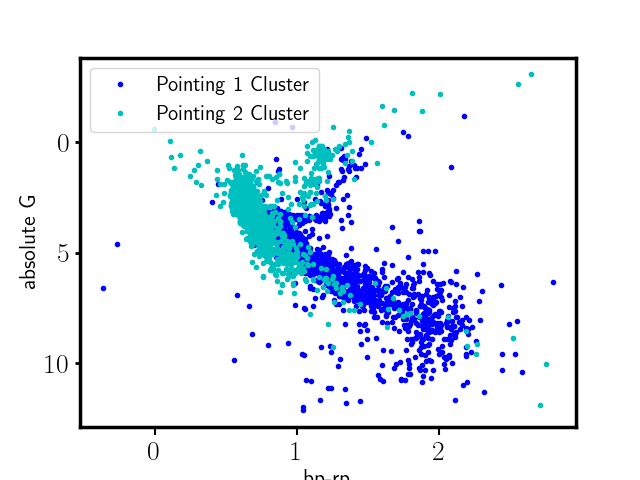

In [126]:
bottom_stars = (np.where( ((PMRA >= -2.84) & (PMRA <= -1.78)) & ((PMDEC>= -1.46) & (PMDEC<= -0.5))  )[0])

x1= 1000/parallax_cluster2
x2= 1000/parallax_cluster3

bprp_tog1 = T[bottom_stars]['bp_rp']
bprp_tog2 = R[middle_stars2]['bp_rp']

absG_tog1 = T[bottom_stars]['phot_g_mean_mag'] - 5. * np.log10(x1/10) 
absG_tog2 = R[middle_stars2]['phot_g_mean_mag'] - 5. * np.log10(x2/10) 


p.figure()
p.plot(bprp_tog1,absG_tog1,'b.', label ='Pointing 1 Cluster')
p.plot(bprp_tog2,absG_tog2,'c.', label ='Pointing 2 Cluster')
p.gca().invert_yaxis()
p.legend()
p.xlabel('bp-rp') #Ra x label
p.ylabel('absolute G') #


In [ ]:
#8pts
#insert code here.
#bottom_stars = (np.where( ((PMRA >= -2.84) & (PMRA <= -1.78)) & ((PMDEC>= -1.46) & (PMDEC<= -0.5))  )[0])

#x1= 1000/parallax_cluster2
#x2= 1000/parallax_cluster3

#bprp_tog1 = T[bottom_stars]['bp_rp']
#bprp_tog2 = R[middle_stars2]['bp_rp']

#absG_tog1 = T[bottom_stars]['phot_g_mean_mag'] - 5. * np.log10(x1/10) 
#absG_tog2 = R[middle_stars2]['phot_g_mean_mag'] - 5. * np.log10(x2/10) 

#absG_cluster111 = absG_tog[bottom_stars] 
#absG_cluster112 = absG_tog[middle_stars2]

#p.figure()
#p.hexbin(bprp_tog1,absG_tog1,bins='log', mincnt=1,cmap='PuOr') 
#p.xlabel('bp-rp') #Ra x label
#p.ylabel('absolute G') #
#p.hexbin(bprp_tog2,absG_tog2,bins='log', mincnt=1,cmap='bwr') 
#p.colorbar(label='log(N)') #add the colorbar to the hexbin defined as PLT
#p.xlim([-0.1, 3])
#p.ylim([-2,13])
#p.gca().invert_yaxis()
#p.tight_layout()